In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt

from components import *

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [2]:
BATCH_SIZE = 128
INPUT_SIZE = Generator.INPUT_SIZE
REAL_LABEL, FAKE_LABEL = 1, 0
dataloader = get_data_loader(train=True, batch_size=BATCH_SIZE)

In [3]:
netG = Generator().to(device)
netD = Discriminator().to(device)
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

criterionD = nn.BCELoss().to(device)
criterionG = nn.MSELoss(reduction='mean').to(device)

G_losses, D_losses = [], []

In [4]:
def train(num_epochs = 1):

    label_real = torch.full((BATCH_SIZE,), REAL_LABEL, device=device, dtype=torch.float)
    label_fake = torch.full((BATCH_SIZE,), FAKE_LABEL, device=device, dtype=torch.float)

    for epoch in range(num_epochs):
        print('   EPOCH: ', epoch)
        for i, data in enumerate(dataloader, 0):
            # ===========TRAIN_DISCRIMINSTOR============
            netD.zero_grad()
            data_real = data[0].to(device)
            output_real = netD(data_real).view(-1)
            errD_real = criterionD(output_real, label_real)
            errD_real.backward()
            D_x = output_real.mean().item()

            noise = torch.randn(BATCH_SIZE, INPUT_SIZE, 1, 1, device=device)
            data_fake = netG(noise)
            output_fake = netD(data_fake.detach()).view(-1)
            errD_fake = criterionD(output_fake, label_fake)
            errD_fake.backward()
            D_G_z1 = output_fake.mean().item()

            errD = errD_real + errD_fake
            optimizerD.step()

            # ===============TRAIN_GENERATOR===============
            netG.zero_grad()
            fxs = netD(data_real, feature_matching='all')
            fgzs = netD(data_fake, feature_matching='all')

            diffs = list()
            for fx, fgz in zip(fxs, fgzs):
                mean_fx = torch.mean(fx, 0).detach()
                mean_fgz = torch.mean(fgz, 0)
                diff = criterionG(mean_fx, mean_fgz)
                diffs.append(diff)
            errG = torch.sum(torch.stack(diffs))

            errG.backward()
            optimizerG.step()

            # Output training stats
            if i % 100 == 0:
                print('[%.3d/%d]   Loss_D: %.4f   Loss_G: %.4f   D(x): %.4f   D(G(z)): %.4f'
                      % (i, len(dataloader), errD.item(), errG.item(), D_x, D_G_z1))

            G_losses.append(errG.item())
            D_losses.append(errD.item())


## TRAINING PROCESS

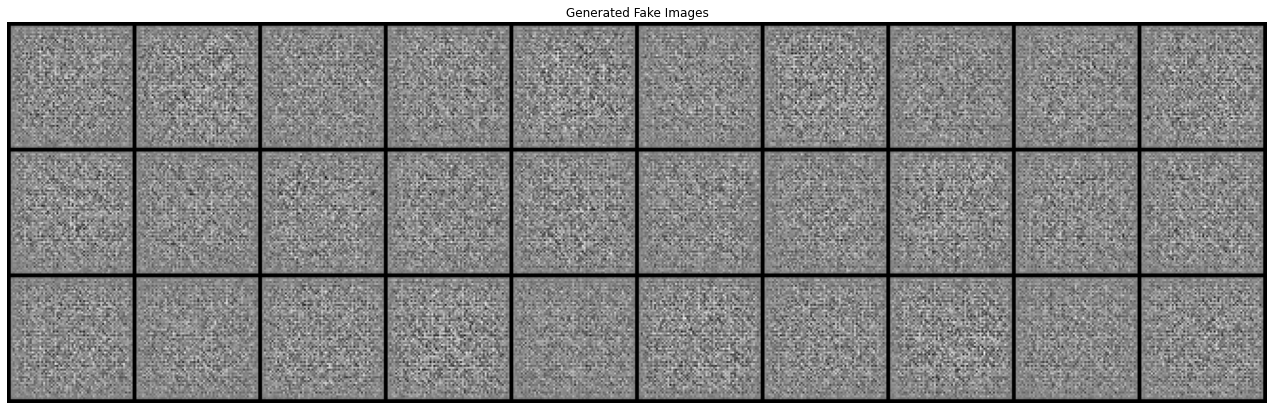

In [5]:
generate_images(netG)

In [6]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 1.9062   Loss_G: 0.4256   D(x): 0.5283   D(G(z)): 0.6066
[100/468]   Loss_D: 0.0233   Loss_G: 0.0560   D(x): 0.9904   D(G(z)): 0.0129
[200/468]   Loss_D: 0.0377   Loss_G: 0.0370   D(x): 0.9809   D(G(z)): 0.0176
[300/468]   Loss_D: 0.0346   Loss_G: 0.0252   D(x): 0.9861   D(G(z)): 0.0200
[400/468]   Loss_D: 0.0261   Loss_G: 0.0259   D(x): 0.9872   D(G(z)): 0.0126
   EPOCH:  1
[000/468]   Loss_D: 0.0211   Loss_G: 0.0288   D(x): 0.9909   D(G(z)): 0.0115
[100/468]   Loss_D: 0.0448   Loss_G: 0.0188   D(x): 0.9805   D(G(z)): 0.0239
[200/468]   Loss_D: 0.0162   Loss_G: 0.0275   D(x): 0.9896   D(G(z)): 0.0056
[300/468]   Loss_D: 0.0738   Loss_G: 0.0181   D(x): 0.9678   D(G(z)): 0.0385
[400/468]   Loss_D: 0.0296   Loss_G: 0.0215   D(x): 0.9800   D(G(z)): 0.0090
   EPOCH:  2
[000/468]   Loss_D: 0.0217   Loss_G: 0.0222   D(x): 0.9840   D(G(z)): 0.0054
[100/468]   Loss_D: 0.0118   Loss_G: 0.0263   D(x): 0.9928   D(G(z)): 0.0045
[200/468]   Loss_D: 0.0085   Loss_G: 

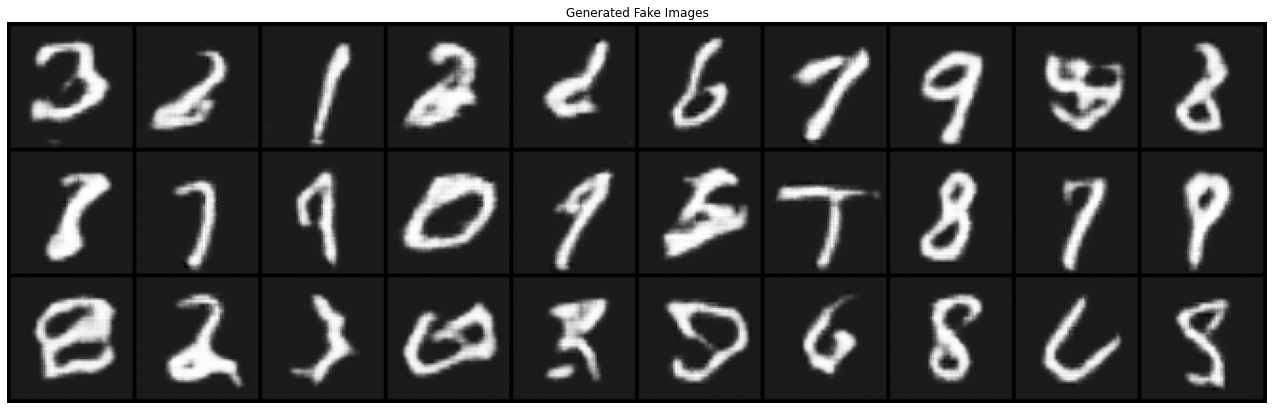

In [7]:
generate_images(netG)

In [8]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0437   Loss_G: 0.0239   D(x): 0.9940   D(G(z)): 0.0332
[100/468]   Loss_D: 0.0142   Loss_G: 0.0158   D(x): 0.9931   D(G(z)): 0.0071
[200/468]   Loss_D: 0.9975   Loss_G: 0.0082   D(x): 0.8548   D(G(z)): 0.5049
[300/468]   Loss_D: 0.4938   Loss_G: 0.0134   D(x): 0.9890   D(G(z)): 0.3371
[400/468]   Loss_D: 0.0418   Loss_G: 0.0145   D(x): 0.9811   D(G(z)): 0.0206
   EPOCH:  1
[000/468]   Loss_D: 0.1632   Loss_G: 0.0142   D(x): 0.9539   D(G(z)): 0.1001
[100/468]   Loss_D: 0.0355   Loss_G: 0.0144   D(x): 0.9906   D(G(z)): 0.0245
[200/468]   Loss_D: 0.0312   Loss_G: 0.0235   D(x): 0.9934   D(G(z)): 0.0205
[300/468]   Loss_D: 0.0213   Loss_G: 0.0180   D(x): 0.9862   D(G(z)): 0.0069
[400/468]   Loss_D: 0.1429   Loss_G: 0.0167   D(x): 0.9479   D(G(z)): 0.0796
   EPOCH:  2
[000/468]   Loss_D: 2.0788   Loss_G: 0.0129   D(x): 0.9973   D(G(z)): 0.7495
[100/468]   Loss_D: 0.0340   Loss_G: 0.0186   D(x): 0.9907   D(G(z)): 0.0236
[200/468]   Loss_D: 0.0474   Loss_G: 

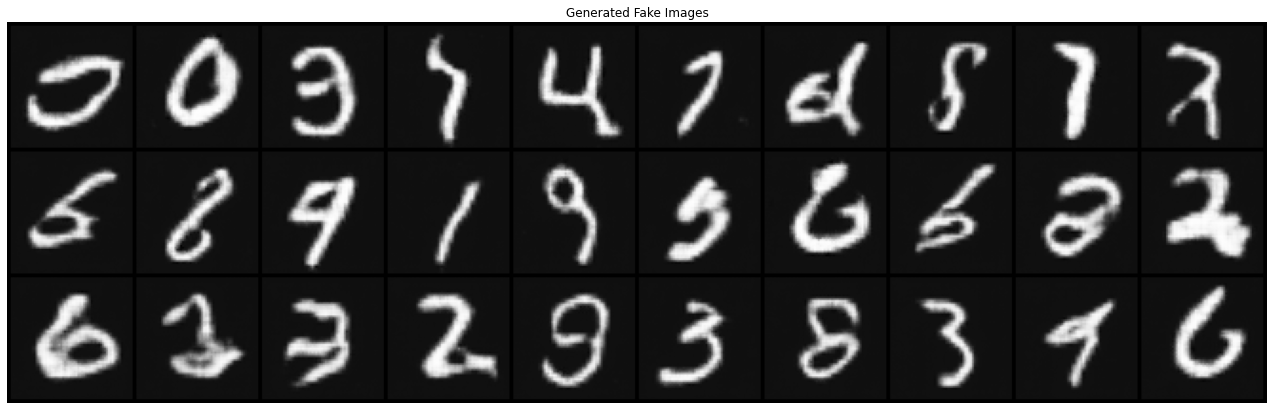

In [9]:
generate_images(netG)

In [10]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.1262   Loss_G: 0.0142   D(x): 0.9399   D(G(z)): 0.0525
[100/468]   Loss_D: 0.0264   Loss_G: 0.0167   D(x): 0.9835   D(G(z)): 0.0086
[200/468]   Loss_D: 0.0363   Loss_G: 0.0180   D(x): 0.9761   D(G(z)): 0.0097
[300/468]   Loss_D: 0.0091   Loss_G: 0.0165   D(x): 0.9949   D(G(z)): 0.0038
[400/468]   Loss_D: 0.6811   Loss_G: 0.0130   D(x): 0.9816   D(G(z)): 0.3926
   EPOCH:  1
[000/468]   Loss_D: 0.1399   Loss_G: 0.0133   D(x): 0.9136   D(G(z)): 0.0373
[100/468]   Loss_D: 0.0513   Loss_G: 0.0143   D(x): 0.9748   D(G(z)): 0.0232
[200/468]   Loss_D: 0.0621   Loss_G: 0.0151   D(x): 0.9891   D(G(z)): 0.0469
[300/468]   Loss_D: 0.0298   Loss_G: 0.0172   D(x): 0.9935   D(G(z)): 0.0221
[400/468]   Loss_D: 0.0433   Loss_G: 0.0209   D(x): 0.9849   D(G(z)): 0.0259
   EPOCH:  2
[000/468]   Loss_D: 0.0171   Loss_G: 0.0154   D(x): 0.9886   D(G(z)): 0.0053
[100/468]   Loss_D: 0.0303   Loss_G: 0.0148   D(x): 0.9745   D(G(z)): 0.0037
[200/468]   Loss_D: 0.0200   Loss_G: 

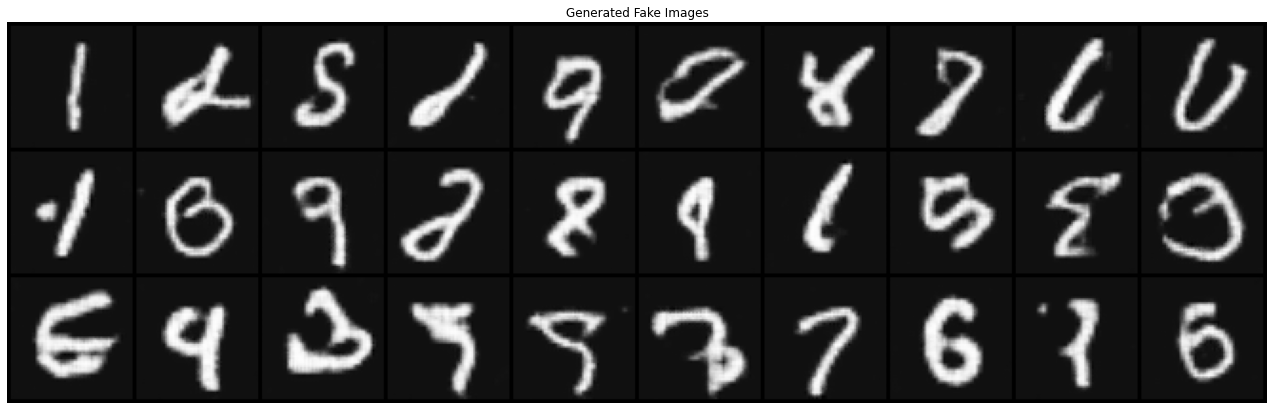

In [11]:
generate_images(netG)

In [12]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0106   Loss_G: 0.0161   D(x): 0.9944   D(G(z)): 0.0048
[100/468]   Loss_D: 0.0123   Loss_G: 0.0188   D(x): 0.9891   D(G(z)): 0.0011
[200/468]   Loss_D: 0.0156   Loss_G: 0.0137   D(x): 0.9946   D(G(z)): 0.0099
[300/468]   Loss_D: 0.0166   Loss_G: 0.0174   D(x): 0.9854   D(G(z)): 0.0015
[400/468]   Loss_D: 0.0076   Loss_G: 0.0168   D(x): 0.9973   D(G(z)): 0.0047
   EPOCH:  1
[000/468]   Loss_D: 0.0077   Loss_G: 0.0175   D(x): 0.9936   D(G(z)): 0.0011
[100/468]   Loss_D: 0.0081   Loss_G: 0.0167   D(x): 0.9942   D(G(z)): 0.0022
[200/468]   Loss_D: 0.1085   Loss_G: 0.0184   D(x): 0.9641   D(G(z)): 0.0620
[300/468]   Loss_D: 0.0666   Loss_G: 0.0128   D(x): 0.9663   D(G(z)): 0.0286
[400/468]   Loss_D: 0.0834   Loss_G: 0.0128   D(x): 0.9545   D(G(z)): 0.0312
   EPOCH:  2
[000/468]   Loss_D: 0.0265   Loss_G: 0.0174   D(x): 0.9888   D(G(z)): 0.0145
[100/468]   Loss_D: 0.0221   Loss_G: 0.0144   D(x): 0.9939   D(G(z)): 0.0152
[200/468]   Loss_D: 0.0109   Loss_G: 

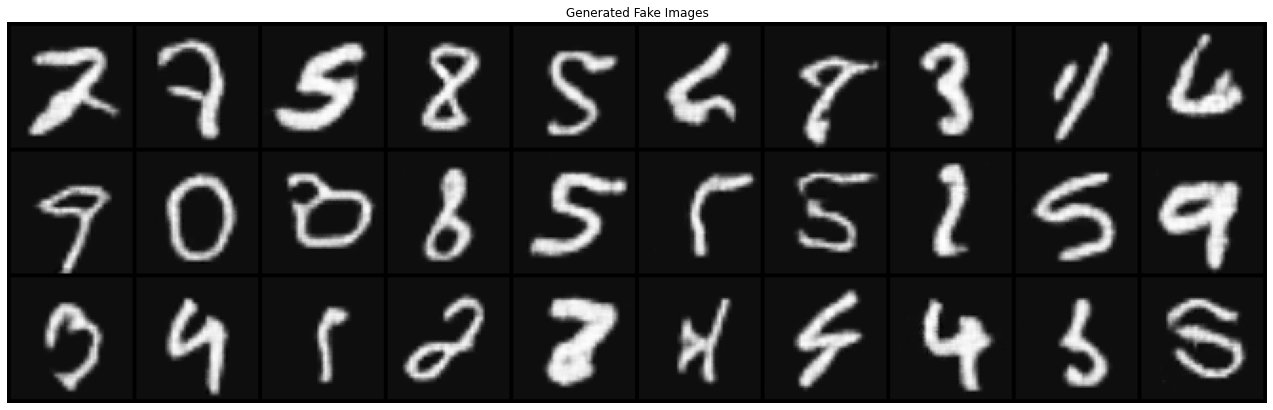

In [13]:
generate_images(netG)

In [14]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.2538   Loss_G: 0.0181   D(x): 0.9973   D(G(z)): 0.1744
[100/468]   Loss_D: 0.3577   Loss_G: 0.0107   D(x): 0.7454   D(G(z)): 0.0064
[200/468]   Loss_D: 0.0692   Loss_G: 0.0133   D(x): 0.9792   D(G(z)): 0.0418
[300/468]   Loss_D: 0.0286   Loss_G: 0.0143   D(x): 0.9799   D(G(z)): 0.0071
[400/468]   Loss_D: 0.0206   Loss_G: 0.0156   D(x): 0.9899   D(G(z)): 0.0097
   EPOCH:  1
[000/468]   Loss_D: 0.4656   Loss_G: 0.0140   D(x): 0.8202   D(G(z)): 0.1852
[100/468]   Loss_D: 0.0472   Loss_G: 0.0128   D(x): 0.9765   D(G(z)): 0.0215
[200/468]   Loss_D: 0.0172   Loss_G: 0.0156   D(x): 0.9949   D(G(z)): 0.0116
[300/468]   Loss_D: 0.0420   Loss_G: 0.0128   D(x): 0.9941   D(G(z)): 0.0272
[400/468]   Loss_D: 0.0165   Loss_G: 0.0141   D(x): 0.9969   D(G(z)): 0.0127
   EPOCH:  2
[000/468]   Loss_D: 0.1199   Loss_G: 0.0147   D(x): 0.9431   D(G(z)): 0.0475
[100/468]   Loss_D: 0.1296   Loss_G: 0.0134   D(x): 0.8984   D(G(z)): 0.0096
[200/468]   Loss_D: 0.0375   Loss_G: 

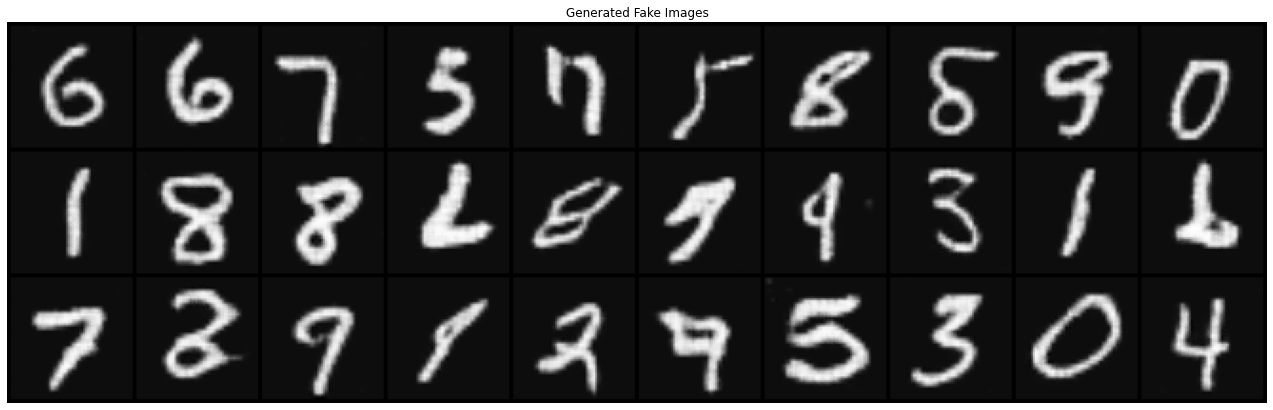

In [15]:
generate_images(netG)

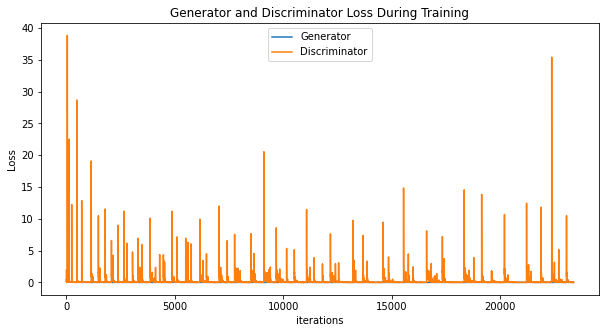

In [16]:
plot_losses(G_losses, D_losses)